In [1]:
import numpy as np
import matplotlib.pylab as pl
import os
import h5py

## define parameters

In [2]:
N=10
K=8
M_sys=1
M_train=1
P=1000000
T=int(1e4)
epochs=200
data_seed=1

store

In [3]:
hashlist_filename = f"../hashlist_N_{N}_K_{K}_Msys_{M_sys}_T_{T}_P_{int(P)}_Mtrain_{M_train}_Ep_{epochs}_dataseed_{data_seed}.npy"
hash_lists=np.load(hashlist_filename,allow_pickle=True).item()
hash_list_keys=[
    'bitpop_data',
    'simple_train',
    'simple_data',
    'match_train',
    'match_data'
]

FileNotFoundError: [Errno 2] No such file or directory: '../hashlist_N_10_K_8_Msys_1_T_10000_P_1000000_Mtrain_1_Ep_200_dataseed_1.npy'

## Plot action-action correlations

In [4]:
def get_action_data(hashh, get_pref_actions=False,data_seed=data_seed):
    outdir = '../output'
    data_dir =f'data_{hashh}'
    data_filename = os.path.join(outdir, data_dir, 'data.h5')
    # load the hdf data
    with h5py.File(data_filename, 'r') as f:
        datasets = {}
        for group_name, group in f.items():
            datasets[group_name] = {key: np.array(
                value) for key, value in group.items()}
    data = datasets[f"dataset_{data_seed}"]
    states = data["states"]
    actions = data["actions"]
    if get_pref_actions:
        preferred_actions = data["preferred_actions"]
        return actions,preferred_actions
    else:
        return actions
def get_corr_matrix(data_matrix):
    n_samples,n_agents = data_matrix.shape
    corr_matrix = np.zeros([n_agents] * 2)
    for i in range(n_agents):
        for j in range(n_agents):
            if i < j:
                corr_matrix[i, j] = 2 * \
                    np.mean(data_matrix[:,i] == data_matrix[:,j]) - 1    
    return corr_matrix + corr_matrix.T + np.identity(n_agents)

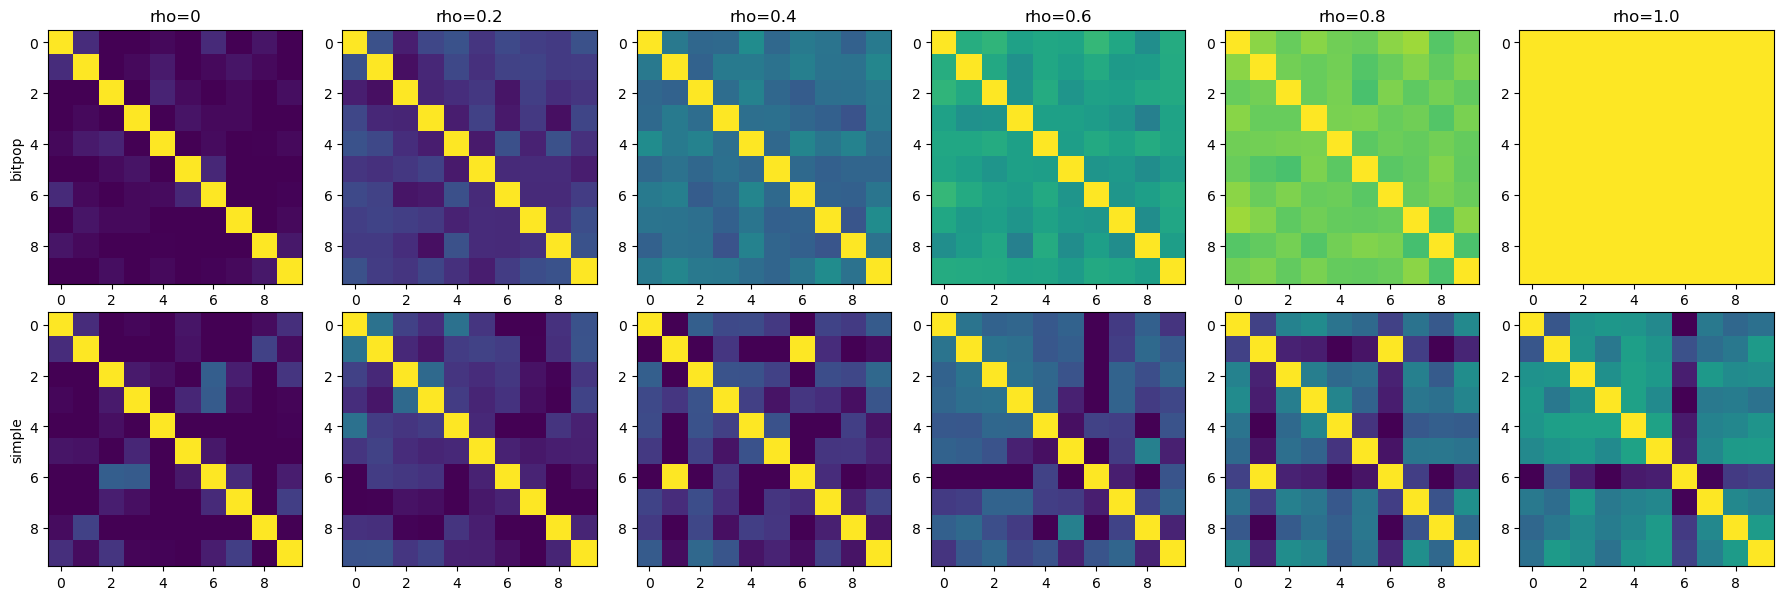

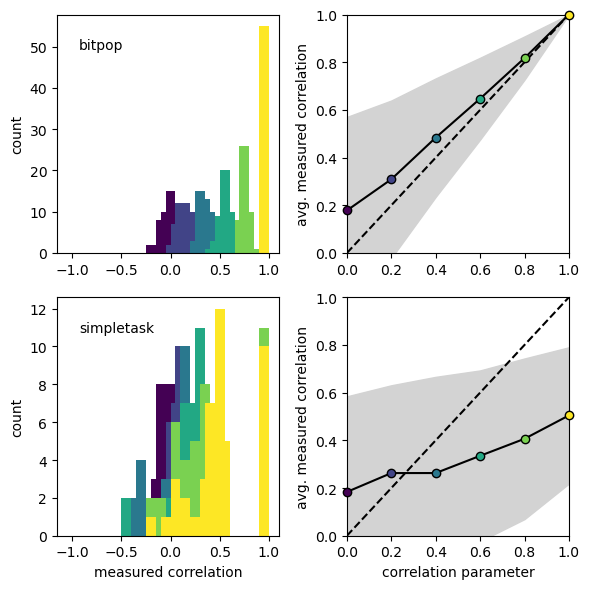

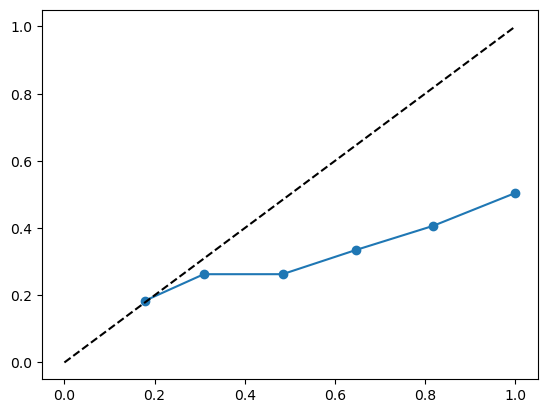

In [55]:
for data_seed in [1]:
    hashlist_filename = f"../hashlist_N_{N}_K_{K}_Msys_{M_sys}_T_{T}_P_{int(P)}_Mtrain_{M_train}_Ep_{epochs}_dataseed_{data_seed}.npy"
    hash_lists=np.load(hashlist_filename,allow_pickle=True).item()
    hash_list_keys=[
        'bitpop_data',
        'simple_train',
        'simple_data',
        'match_train',
        'match_data'
    ]

    corrvec=[0,0.2,0.4,0.6,0.8,1.0]
    net_names = ['bitpop','simple']#,'match']
    corr_matrices={}
    for net_name in net_names:
        hash_list=hash_lists[net_name+'_data']
        corr_matrices[net_name]={}
        for corr,hashh in zip(corrvec,hash_list):
            if net_name=='bitpop':
                actions,pref_actions=get_action_data(hashh,get_pref_actions=True,data_seed=data_seed)
            else:
                actions= get_action_data(hashh)

            actions = (actions==pref_actions[np.newaxis,:])
            corr_matrices[net_name][corr]=get_corr_matrix(actions)
            
    # fig, ax = pl.subplots(len(net_names), len(corrvec), figsize=(3*len(net_names), 3*len(corrvec)))
    fig, ax = pl.subplots(2, len(corrvec), figsize=(3*(len(corrvec)),3*2))
    figt,axt=pl.subplots(2,2,figsize=(6,6))
    figs,axs=pl.subplots()
    colors=pl.cm.get_cmap('viridis')(np.linspace(0,1,len(corrvec)))
    net_data={}
    for nit,net_name in enumerate(net_names):
        
        df=pd.DataFrame(columns=('pcorr','rho'))
        nbins=41
        count_store=np.zeros((len(corrvec),nbins-1))
        means=[]
        stds=[]
        for rit, rho in enumerate(corrvec):
            cmtr=corr_matrices[net_name][rho]
            ax[0, rit].set_title(f"rho={rho}")
            ax[nit, rit].imshow(cmtr,vmin=0,vmax=1)
            mask=np.tril(np.ones(cmtr.shape,dtype=bool))
            means.append(np.mean(cmtr[mask]))
            stds.append(np.std(cmtr[mask]))
            counts, bins =np.histogram(cmtr[mask],bins=np.linspace(-1,1,nbins))
            count_store[rit,:]=counts
            axt[nit,0].bar(bins[:-1],count_store[rit,:],width=0.1,color=colors[rit])
        axt[nit,1].fill_between(x=corrvec,y1=np.array(means)+np.array(stds),y2=np.array(means)-np.array(stds),color='lightgray')
        axt[nit,1].plot(corrvec,means,'k-')
        for rit,corr in enumerate(corrvec):
            axt[nit,1].plot([corr],[means[rit]],'ko',mfc=colors[rit],clip_on=False,zorder=4)
        net_data[net_name]=means
        axt[nit,1].set_ylabel('avg. measured correlation')
        axt[nit,1].plot([0,1],[0,1],'k--')
    #     sns.lineplot(data=df,ax=axt, x='pcorr',y='rho',errorbar='sd')
    #     axt[nit,0].set_xlim(-0.2,1)
        axt[nit,1].set_ylim(0,1)
        axt[nit,1].set_xlim(0,1)
        


        ax[nit, 0].set_ylabel(net_name)
    axs.plot(net_data['bitpop'],net_data['simple'],'o-')
    axs.plot([0,1],[0,1],'k--')

    axt[1,1].set_xlabel('correlation parameter')
    axt[1,0].set_xlabel('measured correlation')
    axt[0,0].set_ylabel('count')
    axt[1,0].set_ylabel('count')
    axt[0,0].text(.1, .9, 'bitpop', ha='left', va='top', transform=axt[0,0].transAxes)
    axt[1,0].text(.1, .9, 'simpletask', ha='left', va='top', transform=axt[1,0].transAxes)

    fig.tight_layout()
    figt.tight_layout()
    # axt.set_ylim(0,1)

In [35]:
import seaborn as sns
import pandas as pd

In [2]:
np.log2(1e4)

13.287712379549449